In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import time
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Makes one figure able to display multiple pictures
def display_multiple(images, titles, number = 1, rows = 1, cols=1):
    fig = plt.figure(figsize=(10, 10))
    for i in range(number):
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(titles[i])
        
types = ['Danaus plexippus',
         'Heliconius charitonius',
         'Heliconius erato',
         'Junonia coenia',
         'Lycaena phlaeas',
         'Nymphalis antiopa',
         'Papilio cresphontes',
         'Pieris rapae',
         'Vanessa atalanta',
         'Vanessa cardui']

In [3]:
#import the data
x = np.load('./Data/Input_227.npy')
y = np.load('./Data/Output_227.npy')

# Generate index based on name, as model.fit cannot use string
index = []
for name in y:
    index.append(types.index(name))

y = np.asarray(index)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                test_size=0.1,
                                                random_state=10)
# Normalizing values
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(748, 227, 227, 3)
(84, 227, 227, 3)
(748,)
(84,)


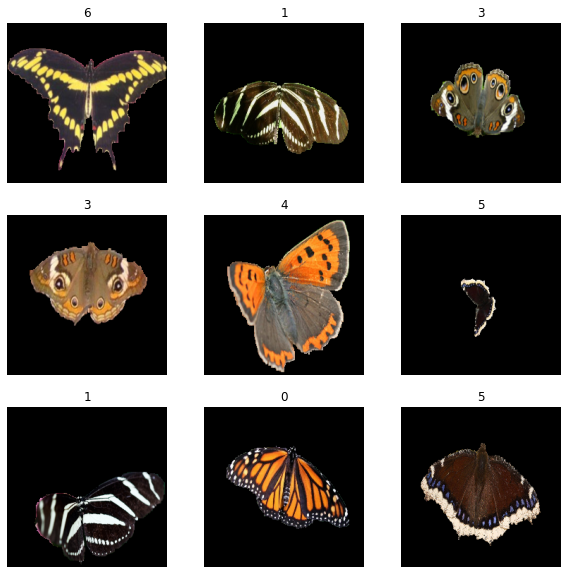

In [4]:
display_multiple(x_train, y_train, 9, 3, 3)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
# Original image is 256x256 but AlexNet takes random 227x227 out of the 
# original size and uses it. https://learnopencv.com/understanding-alexnet/
# instead of doing this we just resize the images to 227x227 in the image generation

image_shape = (227, 227, 3)

model = Sequential()
# Layer 1
model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(BatchNormalization())

# Layer 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(BatchNormalization())

# Layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

# Connected Layer 1 with 4096 neurons
model.add(Dense(4096, input_shape=(227*227*3,), activation='relu'))
model.add(Dropout(0.5))

# Connected Layer 2 with 4096 neurons
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Connected Layer 3 with 1000 neurons
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=[
                  keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                  keras.metrics.SparseTopKCategoricalAccuracy(3, name="top-3-accuracy")])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

Epoch 1/200
24/24 [==============================] - 5s 64ms/step - loss: 3.3691 - accuracy: 0.3650 - top-3-accuracy: 0.6417 - val_loss: 122.5255 - val_accuracy: 0.0833 - val_top-3-accuracy: 0.4524
Epoch 2/200
24/24 [==============================] - 1s 26ms/step - loss: 1.7201 - accuracy: 0.5936 - top-3-accuracy: 0.8570 - val_loss: 21.3474 - val_accuracy: 0.2500 - val_top-3-accuracy: 0.4881
Epoch 3/200
24/24 [==============================] - 1s 26ms/step - loss: 1.4755 - accuracy: 0.6604 - top-3-accuracy: 0.9024 - val_loss: 3.8247 - val_accuracy: 0.4524 - val_top-3-accuracy: 0.7976
Epoch 4/200
24/24 [==============================] - 1s 27ms/step - loss: 0.7061 - accuracy: 0.8035 - top-3-accuracy: 0.9652 - val_loss: 3.9134 - val_accuracy: 0.4762 - val_top-3-accuracy: 0.8214
Epoch 5/200
24/24 [==============================] - 1s 27ms/step - loss: 0.5492 - accuracy: 0.8329 - top-3-accuracy: 0.9679 - val_loss: 1.6253 - val_accuracy: 0.5476 - val_top-3-accuracy: 0.8690
Epoch 6/200
24/24

24/24 [==============================] - 1s 27ms/step - loss: 0.1140 - accuracy: 0.9786 - top-3-accuracy: 0.9987 - val_loss: 0.6635 - val_accuracy: 0.9167 - val_top-3-accuracy: 0.9762
Epoch 43/200
24/24 [==============================] - 1s 27ms/step - loss: 0.1504 - accuracy: 0.9733 - top-3-accuracy: 0.9960 - val_loss: 0.6506 - val_accuracy: 0.9048 - val_top-3-accuracy: 0.9524
Epoch 44/200
24/24 [==============================] - 1s 27ms/step - loss: 0.1912 - accuracy: 0.9733 - top-3-accuracy: 0.9920 - val_loss: 0.7606 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9762
Epoch 45/200
24/24 [==============================] - 1s 27ms/step - loss: 0.1780 - accuracy: 0.9626 - top-3-accuracy: 0.9933 - val_loss: 1.0062 - val_accuracy: 0.9048 - val_top-3-accuracy: 0.9762
Epoch 46/200
24/24 [==============================] - 1s 27ms/step - loss: 0.1926 - accuracy: 0.9706 - top-3-accuracy: 0.9947 - val_loss: 7.0452 - val_accuracy: 0.6667 - val_top-3-accuracy: 0.8810
Epoch 47/200
24/24 [========

Epoch 84/200
24/24 [==============================] - 1s 28ms/step - loss: 0.3075 - accuracy: 0.9666 - top-3-accuracy: 0.9933 - val_loss: 1.8212 - val_accuracy: 0.8810 - val_top-3-accuracy: 0.9405
Epoch 85/200
24/24 [==============================] - 1s 28ms/step - loss: 0.1489 - accuracy: 0.9773 - top-3-accuracy: 0.9973 - val_loss: 1.8898 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9762
Epoch 86/200
24/24 [==============================] - 1s 28ms/step - loss: 0.4886 - accuracy: 0.9786 - top-3-accuracy: 0.9987 - val_loss: 1.5161 - val_accuracy: 0.9167 - val_top-3-accuracy: 0.9643
Epoch 87/200
24/24 [==============================] - 1s 27ms/step - loss: 0.2421 - accuracy: 0.9666 - top-3-accuracy: 0.9987 - val_loss: 1.5342 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9762
Epoch 88/200
24/24 [==============================] - 1s 27ms/step - loss: 0.2911 - accuracy: 0.9813 - top-3-accuracy: 1.0000 - val_loss: 1.7955 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9762
Epoch 89/200
24

24/24 [==============================] - 1s 27ms/step - loss: 0.8918 - accuracy: 0.9666 - top-3-accuracy: 0.9920 - val_loss: 7.6450 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9762
Epoch 126/200
24/24 [==============================] - 1s 27ms/step - loss: 0.3541 - accuracy: 0.9746 - top-3-accuracy: 0.9960 - val_loss: 4.3649 - val_accuracy: 0.9167 - val_top-3-accuracy: 0.9524
Epoch 127/200
24/24 [==============================] - 1s 28ms/step - loss: 0.1964 - accuracy: 0.9799 - top-3-accuracy: 0.9973 - val_loss: 6.4875 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9524
Epoch 128/200
24/24 [==============================] - 1s 27ms/step - loss: 0.2302 - accuracy: 0.9813 - top-3-accuracy: 0.9973 - val_loss: 2.4183 - val_accuracy: 0.9167 - val_top-3-accuracy: 0.9524
Epoch 129/200
24/24 [==============================] - 1s 28ms/step - loss: 0.1806 - accuracy: 0.9840 - top-3-accuracy: 1.0000 - val_loss: 6.6129 - val_accuracy: 0.8810 - val_top-3-accuracy: 0.9405
Epoch 130/200
24/24 [===

24/24 [==============================] - 1s 28ms/step - loss: 0.3955 - accuracy: 0.9799 - top-3-accuracy: 0.9933 - val_loss: 2.8628 - val_accuracy: 0.8571 - val_top-3-accuracy: 0.9405
Epoch 167/200
24/24 [==============================] - 1s 28ms/step - loss: 0.2801 - accuracy: 0.9880 - top-3-accuracy: 0.9987 - val_loss: 1.0178 - val_accuracy: 0.9643 - val_top-3-accuracy: 0.9762
Epoch 168/200
24/24 [==============================] - 1s 28ms/step - loss: 0.2602 - accuracy: 0.9893 - top-3-accuracy: 0.9973 - val_loss: 2.3491 - val_accuracy: 0.8929 - val_top-3-accuracy: 0.9762
Epoch 169/200
24/24 [==============================] - 1s 28ms/step - loss: 0.2687 - accuracy: 0.9960 - top-3-accuracy: 1.0000 - val_loss: 1.0575 - val_accuracy: 0.9643 - val_top-3-accuracy: 0.9881
Epoch 170/200
24/24 [==============================] - 1s 28ms/step - loss: 0.2287 - accuracy: 0.9880 - top-3-accuracy: 0.9987 - val_loss: 1.5288 - val_accuracy: 0.9167 - val_top-3-accuracy: 0.9643
Epoch 171/200
24/24 [===

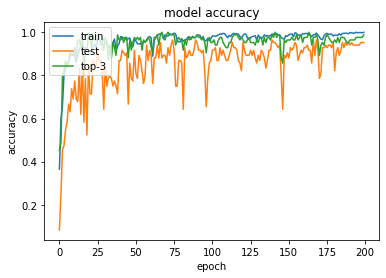

In [6]:
start = time.time()

# Base model for AlexNet
history = model.fit(x_train, 
                    y_train, 
                    epochs=200, 
                    validation_data=(x_test, y_test))

training_time = time.time() - start

_, base_test_acc, top_3_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('\nTest accuracy:', base_test_acc)
print('\nTraining time in seconds:', training_time) 
print(f"Test top 3 accuracy: {round(top_3_accuracy * 100, 2)}%")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_top-3-accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'top-3'], loc='upper left')
plt.show()

In [7]:
model.save('./Models/AlexNetBaseModel.h5')